# ECE 500 Homework 2 - Object Detection
In this homework, you will have to implement Intersection-Over-Union (IoU) in order to evaluate predictions of an object detector, and use PyTorch to load a dataset of predicted and actual bounding boxes. IoU is a popular method to evaluate how accurate a bounding box prediction is compared to an annotated or manually drawn bounding box. The last step is to test the runtime on Google Colab and the RPi of IoU on a large set of predicted and actual bounding boxes.

## Background Information
A bounding box is a rectangular region that is specified by a width and height. In object detection, bounding boxes are used to report the area within an image that an object exists in. The following three ways one can describe a bounding box:

**1)** Explicitly provide 4 points that define the vertices of the box

**2)** Provide an offset of each vertex from the origin, and the width and height of the box

**3)** Provide the upper left vertex and the lower right vertex. We will use this representation for the homework.

When training a neural network for object detection, it is convenient to evalute the loss based on a metric that accounts for how similar the predicted bounding box is to the labelled or actual bounding box. This is exactly the purpose of IoU.

# Upload Instructions
**1)** Once you are finished, go to File -> Print -> Print to PDF. This will save your Google Colab output as a PDF, which you will include in the .ZIP you upload.

**2)** Include your **hw2_rpi_miou.py** script in the .ZIP.

**3)** Include your **Homework_2.ipynb** in the .ZIP. You can go to File -> Download -> .ipynb.


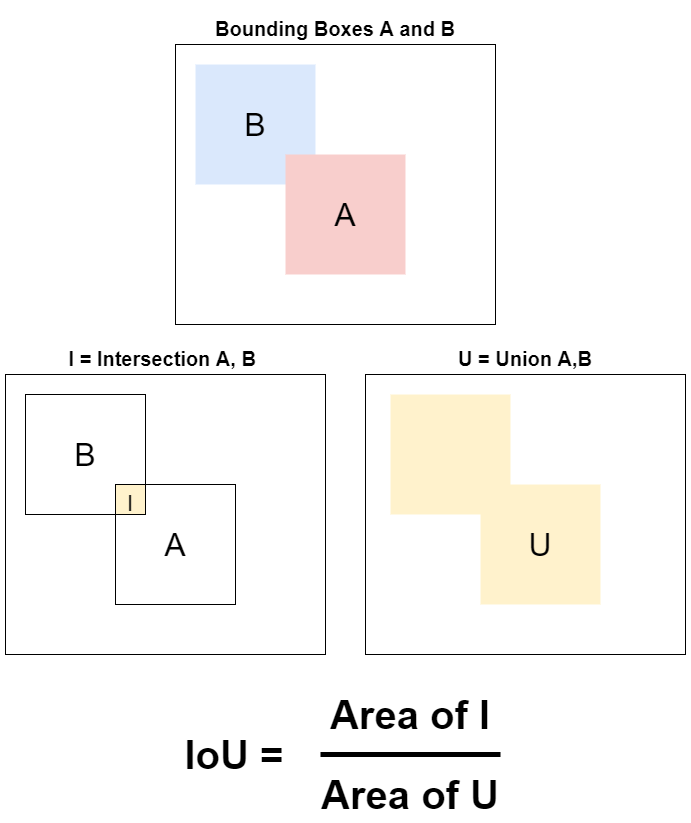

## Given
* Skeleton code of IoU function
* Skeleton code of bounding box MatPlotlib code

## Deliverables
* Implement IoU, compute mean-IoU over the given bounding boxes
* Draw bounding boxes on given images

## Steps
0. Mount a folder in your drive that contains the given images
1. Draw label bounding boxes on given images
2. Implement IoU function
3. Compute mean-IoU on given dataset of predicted and labeled bounding box images. Record inference time and mean-IoU.

## Instructions
**Step 0:** The first step is to mount your Google Drive so that Colab can access the given images. You can create a folder in your Google Drive, upload the images, then adjust the **mpimg.imread(...)** statements in **Step 1** to reflect the path to the images in your drive.


**Step 1:** We will use Matplotlib to render the images and their corresponding bounding boxes. In Step 1, you are required to draw these bounding boxes on the shown images using matplotlib. A useful function to render a bounding box is **[mpatches.Rectangle(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)**. You are provided the upper-left and lower-right vertices of the bounding boxes, which you will use along with **mpatches.Rectangle(...)** to draw the bounding boxes. You should set the parameters **alpha=0.4** and **facecolor="red"**, but it is left to you how to specify **x,y,width, and height**.


**Step 2:** In order to implement the IoU function, first attempt by drawing a diagram of overlapping and non-overlapping bounding boxes. Attempt to derive the upper-left and lower-right vertices of the region where the two bounding boxes intersect. **It is important to remember that the origin of the images is the upper-left corner.** You may need to account for this in your implementation of IoU. 

It is possible for the denominator of the IoU to be equal to 0. In order to account for this, a small number **epsilon=1e-5** should be added to the numerator and denominator of the IoU computation. This gives the IoU numerical stability by avoiding division by 0, and in other cases it does not affect the value.


**Step 3:** This step requires you to run a given script **hw2_rpi_miou.py** on the RPi with slight modifications. You are given a dataset of 20,000 predicted and labeled bounding box pairs, and a skeleton code to load the dataset - all that is left to implement is computing IoU on each element of the dataset, and computing the mean-IoU, the average of IoU across the elements of the data. You should record the time to compute IoU and the mean-IoU and report it in the fill-in text section at the end of this Colab.

In order to receive full credit, the computed mean-IoU should be equal to **0.227 +/- 0.05**. For reference, the runtime of computing 20,000 bounding box pairs on a desktop with Intel I7 CPU and NVIDIA GTX 1070 took **0.24** seconds.

In [ ]:
import numpy
import pycocotools
import torchvision.datasets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from google.colab import drive
###
### Images are taken from MS COCO Dataset
### Bounding boxes of input images are hard-coded here
###

# airplane.jpg
plane_1_label     = [ [140, 11], [224, 94] ]
plane_1_predicted = [ [88, 8], [240, 110] ]
plane_2_label     = [ [274, 128], [340, 180] ]
plane_2_predicted = [ [284, 110], [342, 178] ]
# bear.jpg
bear_bbox_1_label     = [ [76,78], [406,640] ]
bear_bbox_1_predicted = [ [50,69], [410,633] ]
# ski.jpg
skier_1_label     = [ [250, 90], [362, 245] ]
skier_1_predicted = [ [260, 87], [370, 230] ]
skier_2_label     = [ [435, 278], [490, 380] ]
skier_2_predicted = [ [421, 254], [500, 360] ]

### Step 0: Mount your drive where the 3 given images are found
### Student Code Start
drive.mount("/content/drive/")
bear_image      = mpimg.imread('/content/drive/My Drive/HW_2/bear.jpg')
ski_image       = mpimg.imread('/content/drive/My Drive/HW_2/ski.jpg')
airplane_image  = mpimg.imread('/content/drive/My Drive/HW_2/airplane.jpg')
### Student Code End

### Step 1: Plot the bounding boxes
###
### Plot 
###
plt.figure(figsize=(14,14))
###
### bear.jpg
###
plt.subplot(1,5,1)
plt.title('bear.jpg')
plt.imshow(bear_image)
### Student Code Begin
bear_bbox = 
### Student Code End
plt.gca().add_patch(bear_bbox)
###
### ski.jpg
###
plt.subplot(1,5,3)
plt.title('ski.jpg')
plt.imshow(ski_image)
### Student Code Begin
ski_bbox_1 =
ski_bbox_2 =
### Student Code End
plt.gca().add_patch(ski_bbox_1)
plt.gca().add_patch(ski_bbox_2)
###
### airplane.jpg
###
plt.subplot(1,5,5)
plt.title('airplane.jpg')
plt.imshow(airplane_image)
### Student Code Begin
plane_bbox_1 =
plane_bbox_2 = 
### Student Code End
plt.gca().add_patch(plane_bbox_1)
plt.gca().add_patch(plane_bbox_2)
plt.show()

In [ ]:
### Step 2: Implement IoU
### Hint: Draw a picture of and non-overlapping and overlapping boxes and derive the bounding box of the 
### region where the boxes intersect
### Implemented correctly, IoU will return a value in the range [0.0,1.0]
def IoU(predictedBoundingBox:list, labelBoundingBox:list) -> float:
  ### Student Code Begin ###
  smoothness = 1e-5
  iou = 0
  return iou
  ### Student Code End ###
# Print the IoU of the given images
print("IoU of predicted and labeled bbox on bear.jpg: {:.2f}".format( IoU(bear_bbox_1_label, bear_bbox_1_predicted) ))
print("IoU of predicted and labeled bbox on airplane.jpg: {:.2f}".format( IoU(plane_1_label, plane_1_predicted) ))
print("IoU of predicted and labeled bbox on airplane.jpg: {:.2f}".format( IoU(plane_2_label, plane_2_predicted) ))
print("IoU of predicted and labeled bbox on ski.jpg: {:.2f}".format( IoU(skier_1_label, skier_1_predicted) ))
print("IoU of predicted and labeled bbox on ski.jpg: {:.2f}".format( IoU(skier_2_label, skier_2_predicted) ))

**RPi Step 3 Results:**

**Accuracy (mean-IoU):**

**Time to evaluate bounding boxes (seconds):**